# Data preparation
##### 1. Load the data from EDA
##### 2. Normalize
##### 3. Set up a Data pipeline, do shuffle, split the data into training, testing, split up into batches

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [2]:
#load data
df = pd.read_csv('/content/sample_data/CreditCard_EDA_balanced6636.csv')
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,9.446729,31,-1,-1,-1,-1,-1,-1,4.856966,5.725109,...,0,0,1,0,0,0,0,0,1,0
1,8.987197,35,-2,-2,-2,-2,-2,-2,5.191289,5.504654,...,0,1,0,0,0,0,0,1,0,0
2,7.418581,23,-1,-1,-2,-2,-2,-2,4.353284,0.000000,...,1,0,0,0,0,0,0,0,1,0
3,9.305651,32,0,0,0,0,0,0,8.598202,8.525856,...,1,0,0,0,0,0,0,0,1,0
4,7.888585,35,-1,-1,-1,-1,-1,0,4.567814,5.788532,...,0,1,0,0,0,0,0,1,0,0


In [3]:
df.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month',
       'SEX_1', 'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [4]:
df[['default.payment.next.month']].values.shape
df[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'SEX_1', 'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3']].values.shape

(13272, 33)

In [5]:
#Normalization, Pouring data into pipeline, shuffle, split the training, evaluating, and testing data, split the dataset into batches

X = df[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'SEX_1', 'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3']].values
y = np.squeeze(df[['default.payment.next.month']].values)
print(X.shape, y.shape)

# Normalize the input features using Z-score normalization
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

print(X[0])
print(X_normalized[0])
print(y[0:5])


(13272, 33) (13272,)
[ 9.44672915 31.         -1.         -1.         -1.         -1.
 -1.         -1.          4.85696598  5.72510899  6.22502037  5.9177283
  6.03092562  6.12249281  5.73009978  6.23002202  5.92265023  6.03172638
  6.12745126  6.40031281  0.          1.          0.          0.
  0.          1.          0.          0.          0.          0.
  0.          1.          0.        ]
[ 1.34046716 -0.49059068 -0.97329516 -0.80112701 -0.76655653 -0.72206122
 -0.68971224 -0.65954396 -0.40523466 -0.01855997  0.19718281  0.12348441
  0.21222476  0.2857089   0.99726323  1.2382585   1.18040457  1.29258012
  1.32820307  1.4538196  -0.83627734  0.83627734 -0.02297182 -0.71322938
 -0.95735798  2.18700858 -0.05358537 -0.08216519 -0.03980937 -0.03363745
 -0.92996273  0.95303066 -0.10583005]
[0 0 0 0 0]


In [6]:
# Create a TensorFlow Dataset from the normalized input features and target labels
dataset = tf.data.Dataset.from_tensor_slices((X_normalized, y))

# Shuffle the dataset
dataset = dataset.shuffle(buffer_size=len(X_normalized))

# Split the data into train, validation, and test sets
train_size = int(0.8 * len(X_normalized))
val_size = int(0.1 * len(X_normalized))
test_size = int(0.1 * len(X_normalized))

# Split the dataset into train, validation, and test sets
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset = dataset.skip(train_size + val_size).take(test_size)

# Batch the datasets
batch_size = 8
train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

it = train_dataset.as_numpy_iterator()
print(it.next()[0].shape, it.next()[1].shape) #return a batch (X,y)
print(it.next()[0], it.next()[1]) #return a batch (X,y)
# for features, labels in train_dataset:
#   print("Train Features shape:", features.shape)
#   print("Train Labels shape:", labels.shape)

(8, 33) (8,)
[[ 1.09608251  2.26736944 -0.97329516 -0.80112701 -0.76655653  1.54776269
  -0.68971224  0.11209457 -0.51949102 -1.22007291 -0.69894791 -1.11416389
  -0.64939465 -0.97086352 -0.4658337   0.12783263 -1.53177656  0.20503878
  -1.46681399 -1.41461444 -0.83627734  0.83627734 -0.02297182 -0.71322938
   1.04454136 -0.45724558 -0.05358537 -0.08216519 -0.03980937 -0.03363745
  -0.92996273  0.95303066 -0.10583005]
 [ 0.82139191  1.10054016 -0.18313285 -0.05935516 -0.0206266   0.03454675
   0.08597294  0.11209457  1.09135957  0.9915778   0.93171183  0.88392328
   0.83566054  0.79263704  0.88194946  0.53765848  0.49542296  0.87204567
   0.70413482  0.99581011  1.19577555 -1.19577555 -0.02297182 -0.71322938
   1.04454136 -0.45724558 -0.05358537 -0.08216519 -0.03980937 -0.03363745
   1.07531191 -1.04928419 -0.10583005]
 [-1.28438776 -0.70274146  0.60702945  1.42418853  1.47123326  1.54776269
   1.63734331  1.65537162  0.37367404  0.4109468   0.44864641  0.4914701
   0.53508291  0.54144

# Modeling


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

In [8]:
tf.keras.backend.clear_session()

In [9]:
model = Sequential()

In [10]:
it = train_dataset.as_numpy_iterator()
print(it.next()[0].shape, it.next()[1].shape) #return a batch (X,y)
input_shape = it.next()[0].shape
input_shape[1]

(8, 33) (8,)


33

In [11]:
# a binary classification, taking signoid as the output activation function
# Don't need an input layer since it's sequential

model.add(Dense(256, input_shape=(input_shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

#optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer= tf.keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [12]:
input_shape = (8, 33)
model.build(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               8704      
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 28,978
Trainable params: 28,978
Non-traina

In [31]:
hist = model.fit(train_dataset, epochs=100, validation_data=val_dataset) #shuffle after every epochs = True

#learning rate 0.001, batch size 16
#100 epoch, accuracy:0.9, val_accuracy:0.9, no overfitting
#130 0.91 / 0.91
#150 0.915/0.91
#170 0.925 / 0.925 testing 0.93
#190 0.926 / 0.93 testing 0.93

#batch size 16->8, learning rate 0.001->0.0001. more precise.
#200 epochs, 0.936/0.938/0.94


Epoch 1/100
1328/1328 [==============================] - 7s 5ms/step - loss: 0.2433 - accuracy: 0.8889 - val_loss: 0.2271 - val_accuracy: 0.8937
Epoch 2/100
1328/1328 [==============================] - 6s 4ms/step - loss: 0.2360 - accuracy: 0.8930 - val_loss: 0.2238 - val_accuracy: 0.8998
Epoch 3/100
1328/1328 [==============================] - 7s 5ms/step - loss: 0.2379 - accuracy: 0.8938 - val_loss: 0.2010 - val_accuracy: 0.9088
Epoch 4/100
1328/1328 [==============================] - 6s 4ms/step - loss: 0.2343 - accuracy: 0.8978 - val_loss: 0.2021 - val_accuracy: 0.9133
Epoch 5/100
1328/1328 [==============================] - 7s 5ms/step - loss: 0.2349 - accuracy: 0.8938 - val_loss: 0.2167 - val_accuracy: 0.9050
Epoch 6/100
1328/1328 [==============================] - 6s 4ms/step - loss: 0.2264 - accuracy: 0.8972 - val_loss: 0.2087 - val_accuracy: 0.9103
Epoch 7/100
1328/1328 [==============================] - 7s 5ms/step - loss: 0.2255 - accuracy: 0.9004 - val_loss: 0.2021 - val_ac

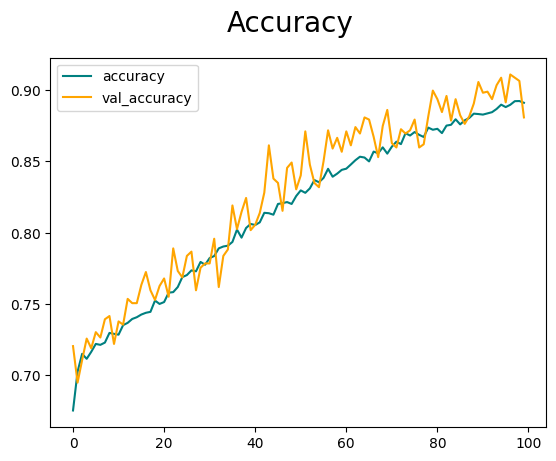

In [14]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [15]:
test_accuracy = model.evaluate(test_dataset,verbose=0,return_dict=True)['accuracy']
test_accuracy

0.8899773955345154

# Feature reduction
Try different combinations of features.
1. Removing collinear  features may help to boost the performance
2. Some setups may have business meaning except for the model training purpose.

In [16]:
# #Removing collinear features may make us lose some information under these columns.
# #Know whether default or not 6 months ahead.
# #Remove features that contain less data

# X_reduced_2 = df[['LIMIT_BAL', 'AGE', 'PAY_6','BILL_AMT6','PAY_AMT6',
#        'SEX_1', 'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2',
#        'EDUCATION_3','MARRIAGE_1', 'MARRIAGE_2']].values
# y = np.squeeze(df[['default.payment.next.month']].values)

# # Normalize the input features using Z-score normalization
# scaler = StandardScaler()
# X_reduced_normalized = scaler.fit_transform(X_reduced_2)

In [17]:
# # Create a TensorFlow Dataset from the normalized input features and target labels
# dataset_r = tf.data.Dataset.from_tensor_slices((X_reduced_normalized, y))

# # Shuffle the dataset
# dataset_r = dataset_r.shuffle(buffer_size=len(X_reduced_normalized))

# # Split the data into train, validation, and test sets
# train_size = int(0.8 * len(X_reduced_normalized))
# val_size = int(0.1 * len(X_reduced_normalized))
# test_size = int(0.1 * len(X_reduced_normalized))

# # Split the dataset into train, validation, and test sets
# train_dataset_r = dataset_r.take(train_size)
# val_dataset_r = dataset_r.skip(train_size).take(val_size)
# test_dataset_r = dataset_r.skip(train_size + val_size).take(test_size)

# # Batch the datasets
# batch_size = 8
# train_dataset_r = train_dataset_r.batch(batch_size)
# val_dataset_r = val_dataset_r.batch(batch_size)
# test_dataset_r = test_dataset_r.batch(batch_size)

# it = train_dataset_r.as_numpy_iterator()
# print(it.next()[0].shape, it.next()[1].shape) #return a batch (X,y)
# print(it.next()[0], it.next()[1]) #return a batch (X,y)
# # for features, labels in train_dataset:
# #   print("Train Features shape:", features.shape)
# #   print("Train Labels shape:", labels.shape)

In [18]:
# tf.keras.backend.clear_session()

In [19]:
# model_2 = Sequential()

In [20]:
# it = train_dataset_r.as_numpy_iterator()
# print(it.next()[0].shape, it.next()[1].shape) #return a batch (X,y)
# input_shape = it.next()[0].shape
# input_shape[1]

In [21]:
# # a binary classification, taking signoid as the output activation function
# # Don't need an input layer since it's sequential

# model_2.add(Dense(256, input_shape=(input_shape[1],), activation='relu'))
# model_2.add(Dense(64, activation='relu'))
# model_2.add(Dense(16, activation='relu'))
# model_2.add(Dense(32, activation='relu'))
# model_2.add(Dense(64, activation='relu'))
# model_2.add(Dense(1, activation='sigmoid'))

# #optimizer = Adam(learning_rate=0.00001)
# model_2.compile(optimizer= tf.keras.optimizers.Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# hist = model_2.fit(train_dataset_r, epochs=200, validation_data=val_dataset_r)

In [23]:
# fig = plt.figure()
# plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
# plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
# fig.suptitle('Accuracy', fontsize=20)
# plt.legend(loc="upper left")
# plt.ylim(0.74, 0.94)
# plt.show()
# ##didn't increase the accuracy

In [24]:
# test_accuracy = model.evaluate(test_dataset_r,verbose=0,return_dict=True)['accuracy']
# test_accuracy

Now, our first model can predict whether a specific credit card owner will default or not based on his/her long-term repayment status (6 months) and the predicting accuracy is 94%. Also, we have another model that can make predictions six months ahead and the accuracy is 81%. For a real-world scenario, we can send out a warning message six months ahead and a forecast a month ahead that can help the bank to get prepared.

In [25]:
#How about 5 months or 4 months ahead?
#any other way to boost accuracy?
#Provide more data
  #Cross Validation
  #combine training and valuating data set.



# Evaluation
##### https://www.kaggle.com/code/jcontr/meta-learning-credit-card-default
##### 1. Is the data unbalanced on the feature of whether default?
##### 2. Do we need to reduce the dimensions? 33 features and most of them are generated by one hot encoding and they're sparse.

Bias sanity check:
1. Historical bias / representation bias / measurement bias
2. Learning bias
3. Evaluation bias
4. Aggregation bias
5. Deployment bias


In [32]:
model.evaluate(test_dataset,verbose=0,return_dict=True)

{'loss': 0.1529790163040161, 'accuracy': 0.9336850047111511}

In [33]:
test_prediction = model.predict(test_dataset)
print(test_prediction.shape)
test_prediction
#3000 probabilities

166/166 [==============================] - 0s 2ms/step
(1327, 2)


array([[8.85894418e-01, 1.14105575e-01],
       [4.49980423e-03, 9.95500147e-01],
       [9.88033950e-01, 1.19659789e-02],
       ...,
       [6.67716620e-07, 9.99999285e-01],
       [4.76310909e-01, 5.23689091e-01],
       [9.99897242e-01, 1.02718128e-04]], dtype=float32)

In [34]:
y_test_true = []
y_test_predicted = []

#expand true label y in test_dataset and save it in the list. Make prediction by batches and save it in the list
#Must do the prediction and expanding under same for loop otherwise the sequence may be messed up.
#Try sigmoid?

for test_features, y_test in test_dataset:
  predictions = model.predict(test_features, verbose=0)
  y_test_predicted.extend(np.argmax(predictions, axis=1).tolist())
  y_test_true.extend(y_test.numpy())
print(f"True label    : {y_test_true[0:20]}")
print(f"Predicted label: {y_test_predicted[0:20]}")

correct_predictions = sum(np.array(y_test_predicted) == np.array(y_test_true))
total_samples = len(y_test_true)
accuracy = correct_predictions / total_samples
print("Manual Accuracy:", accuracy)

True label    : [1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0]
Predicted label: [1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0]
Manual Accuracy: 0.9366993217784476


In [29]:
"""
Have no idea why the test accuracy by model.eval and model.predict + threshold is so different?
Must do the prediction and expanding under same for loop otherwise the sequence may be messed up.?
"""

# #get the prediction result
# train_prediction_binary = []
# for prediction in train_prediction:
#   #print(prediction)
#   if prediction >= 0.5: #take 0.5 as threshold, default of model.evaluation is also 0.5
#     train_prediction_binary.append(1)
#   else:
#     train_prediction_binary.append(0)
# print(len(train_prediction_binary))
# print(train_prediction_binary[0:20])

# #get y_test, take y_test out from data pipeline and put it into a list
# y_train_all = []
# for train_features, y_train in train_dataset:
#   y_train_all.extend(y_train.numpy())
# print(len(y_train_all))
# print(y_train_all[0:20])

# correct_predictions = sum(np.array(train_prediction_binary) == np.array(y_train_all))
# total_samples = len(y_train_all)
# accuracy = correct_predictions / total_samples

# print("Manual Accuracy with Threshold 0.5:", accuracy)

'\nHave no idea why the test accuracy by model.eval and model.predict + threshold is so different?\nMust do the prediction and expanding under same for loop otherwise the sequence may be messed up.?\n'

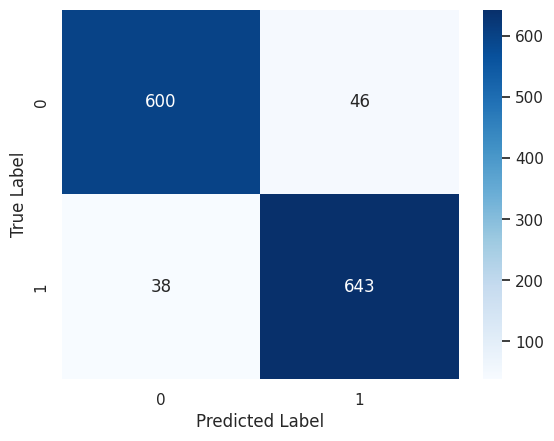

[[600  46]
 [ 38 643]]


In [35]:
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test_true, y_test_predicted)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues')
# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()
print(confusion_matrix.numpy())

We have
1. 30000 (23364+6636) examples, 90% of accuracy, 100 epochs, 74% of recall.
2. 22636 (16000+6636) examples, 90% of accuracy, 100 epochs, 78% of recall. [[1560   58]
 [ 137  508]]
3. 16636 (10000+6636) examples, 89.7% of accuracy, 100 epochs, 84% of recall.
[[932  65]
 [105 561]]
4. 13272 (6636+6636) examples, 89.5% of accuracy, 100 epochs, 86% of recall.
[[651  33]
 [ 86 557]]
4. 13272 (6636+6636) examples, 93% of accuracy, 200 epochs, 94% of recall.
[[600  46]
 [ 38 643]]
